In [1]:
import pandas as pd

df = pd.read_csv("rpg_steam_clean.csv", thousands=",")
df = df.drop("steam_id_number", axis=1)
df = df.sort_values(["release_year", "release_month"])

In [2]:
df.sample(5)

,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher
1345,Clash of Irons,March,2021,0.00,20000,50000,35000,HQ Games,HQ Games
4425,The Exodus,March,2022,2.74,20000,20000,20000,Old Eagle,Old Eagle
5249,Harsh,January,2018,9.99,20000,20000,20000,Harsh Reality Productions LLC,Harsh Reality Productions LLC
8666,Vampirem,May,2021,14.99,20000,20000,20000,WRF Studios,WRF Studios
212,SpellForce 3: Soul Harvest,May,2019,19.99,100000,200000,150000,Grimlore Games,THQ Nordic


- [X] Evolución precio a lo largo del tiempo
- [ ] Identificar palabras estrella en los nombres del os juegos
- [X] Normalizar precio y ventas por el momento en el tiempo
- [ ] Regresión del precio del juego en función de palabras en título
- [ ] Jugadores estimados en función del desarrollador y medir éxito de desarrollador


In [3]:
TODAY_YEAR = 2023
df["year_month"] = df.release_year.astype("str").str.cat(df.release_month, sep="_")
df["norm_game_title"] = (
    df.game_title.str.lower().str.strip().str.replace(r"\s+", " ", regex=True)
)
df["develop_equals_published"] = df.developer.eq(df.publisher)
df["total_estimated_revenue"] = df.release_price * df.average_estimated_owners_number
df["free_to_play"] = df.release_price < 0.01
df["age"] = TODAY_YEAR - df.release_year
df["players_rate_inside_year"] = df.groupby(
    "release_year"
).average_estimated_owners_number.transform(lambda s: s / s.sum())

In [4]:
df = df.loc[df.release_year.between(2006, 2022)]

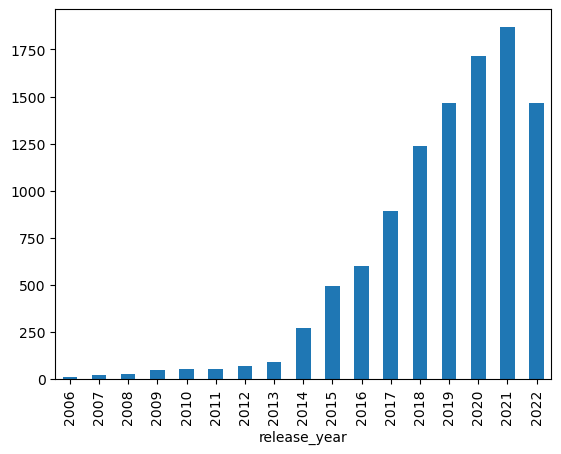

In [5]:
df.groupby("release_year").average_estimated_owners_number.count().plot.bar()

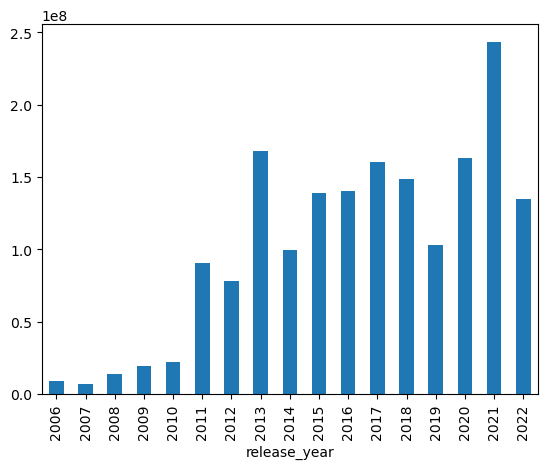

In [6]:
df.groupby("release_year").average_estimated_owners_number.sum().plot.bar()

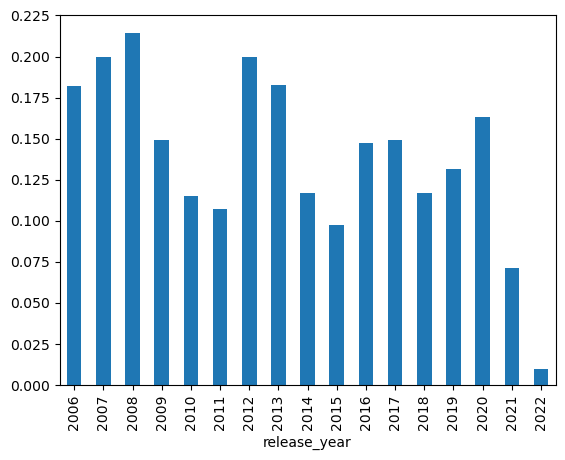

In [7]:
df.groupby("release_year").free_to_play.mean().plot.bar()

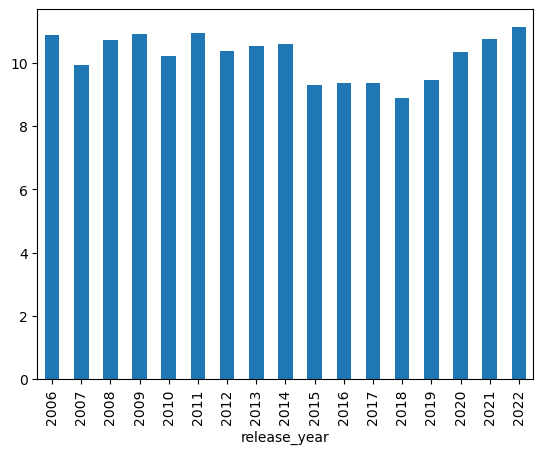

In [8]:
df.loc[df.free_to_play.eq(False)].groupby(
    "release_year"
).release_price.mean().plot.bar()

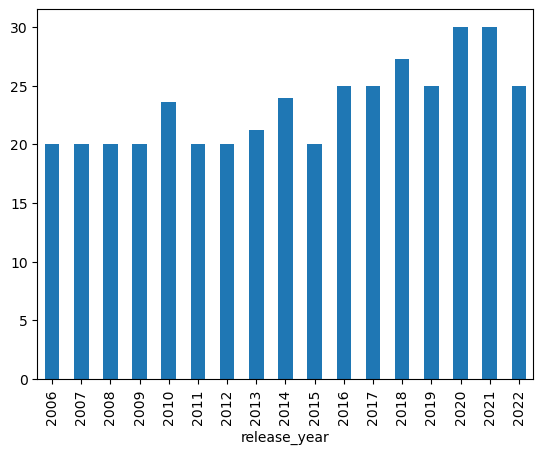

In [9]:
df.loc[df.free_to_play.eq(False)].groupby("release_year").release_price.quantile(
    0.95
).plot.bar()

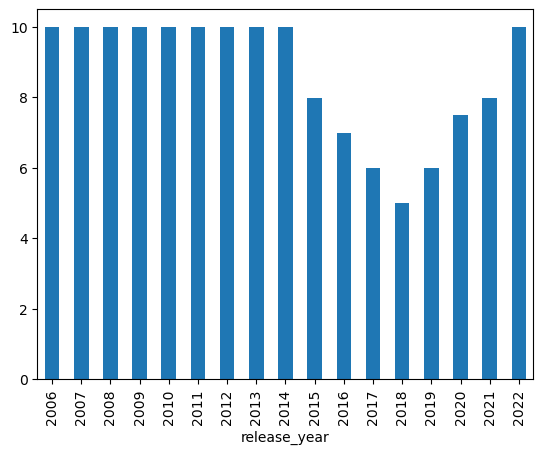

In [10]:
df.loc[df.free_to_play.eq(False)].groupby(
    "release_year"
).release_price.median().plot.bar()

In [11]:
import re

re.sub(r"\s+", " ", " a   aszxczxc   asdasd  ")

' a aszxczxc asdasd '

In [12]:
df.sample(5)

,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher,year_month,norm_game_title,develop_equals_published,total_estimated_revenue,free_to_play,age,players_rate_inside_year
9410,Enemy,March,2015,14.99,20000,20000,20000,Tom Johnson,Tom Johnson,2015_March,enemy,True,299800.0,False,8,0.000144
5915,A Matter of Time,October,2020,3.99,20000,20000,20000,Haywire Game Studios,Haywire Game Studios,2020_October,a matter of time,True,79800.0,False,3,0.000123
2005,League of Maidens,February,2021,0.00,500000,1000000,750000,Maiden Gaming Inc.,Maiden Gaming Inc.,2021_February,league of maidens,True,0.0,True,2,0.003083
10389,Age of Gladiators,February,2016,9.99,100000,200000,150000,Creative Storm Entertainment,Creative Storm Entertainment,2016_February,age of gladiators,True,1498500.0,False,7,0.001071
36,Rogue Legacy 2,April,2022,24.99,200000,500000,350000,Cellar Door Games,Cellar Door Games,2022_April,rogue legacy 2,True,8746500.0,False,1,0.002595


In [13]:
df.groupby("free_to_play").players_rate_inside_year.describe()

,count,mean,std,min,25%,50%,75%,max
free_to_play,,,,,,,,
False,9263.0,0.001395,0.010802,0.000082,0.000125,0.000148,0.000250,0.386569
True,1129.0,0.003616,0.019334,0.000082,0.000135,0.000236,0.001011,0.374532


In [14]:
df.groupby("develop_equals_published").players_rate_inside_year.describe()

,count,mean,std,min,25%,50%,75%,max
develop_equals_published,,,,,,,,
False,3415.0,0.002683,0.015811,0.000082,0.000135,0.000195,0.000556,0.374532
True,6977.0,0.001123,0.009639,0.000082,0.000123,0.000148,0.000218,0.386569


In [15]:
df.groupby("develop_equals_published").release_price.describe()

,count,mean,std,min,25%,50%,75%,max
develop_equals_published,,,,,,,,
False,3415.0,11.356542,11.627009,0.0,2.99,9.99,14.99,199.99
True,6977.0,7.828378,9.384203,0.0,1.99,4.99,9.99,199.99


In [16]:
success_by_developer = (
    df.groupby("developer")
    .average_estimated_owners_number.mean()
    .sort_values(ascending=False)
)
success_by_developer.head(10)

developer
Amazon Games                       75000000.0
OVERKILL - a Starbreeze Studio.    35000000.0
FromSoftware Inc.                  35000000.0
Grinding Gear Games                35000000.0
Re-Logic                           35000000.0
Digital Extremes                   35000000.0
Facepunch Studios                  35000000.0
Iron Gate AB                       35000000.0
Smilegate RPG                      35000000.0
ConcernedApe                       15000000.0
Name: average_estimated_owners_number, dtype: float64

In [17]:
df.loc[df.developer.eq("Amazon Games")]

,game_title,release_month,release_year,release_price,lowest_estimated_owners_number,highest_estimated_owners_number,average_estimated_owners_number,developer,publisher,year_month,norm_game_title,develop_equals_published,total_estimated_revenue,free_to_play,age,players_rate_inside_year
557,New World,September,2021,39.99,50000000,100000000,75000000,Amazon Games,Amazon Games,2021_September,new world,True,2.999250e+09,False,2,0.308268
